In [1]:
import pandas as pd

In [2]:
raw_data = pd.read_csv("../datasets/balancedDataset.csv")
raw_data.head()

,vehicletype,vehiclemodel,vehicleprimaryuse,vehicleregistrationnumber,label
0,0,94,9,1,35
1,0,93,12,1,13
2,0,94,9,3,35
3,0,94,9,2,35
4,0,87,9,1,37


In [3]:
print("Shape:", raw_data.shape)
raw_data["label"].value_counts()

Shape: (8646, 5)


label
35    786
13    786
37    786
8     786
28    786
5     786
19    786
16    786
2     786
39    786
32    786
Name: count, dtype: int64

In [4]:
from sklearn.manifold import TSNE
import pandas as pd

# Split features and labels
X = raw_data.iloc[:int(raw_data.shape[0]), :-1]
y = raw_data.iloc[:int(raw_data.shape[0]), -1]

In [5]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42, method='barnes_hut', verbose=1)
tsne_result = tsne.fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 8646 samples in 0.040s...
[t-SNE] Computed neighbors for 8646 samples in 0.667s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8646
[t-SNE] Computed conditional probabilities for sample 2000 / 8646
[t-SNE] Computed conditional probabilities for sample 3000 / 8646
[t-SNE] Computed conditional probabilities for sample 4000 / 8646
[t-SNE] Computed conditional probabilities for sample 5000 / 8646
[t-SNE] Computed conditional probabilities for sample 6000 / 8646
[t-SNE] Computed conditional probabilities for sample 7000 / 8646
[t-SNE] Computed conditional probabilities for sample 8000 / 8646
[t-SNE] Computed conditional probabilities for sample 8646 / 8646
[t-SNE] Mean sigma: 1.209376
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.290592
[t-SNE] KL divergence after 1000 iterations: 0.256226


In [6]:
data = pd.DataFrame(tsne_result, columns=['Dimension 1', 'Dimension 2'])
data['Target'] = y

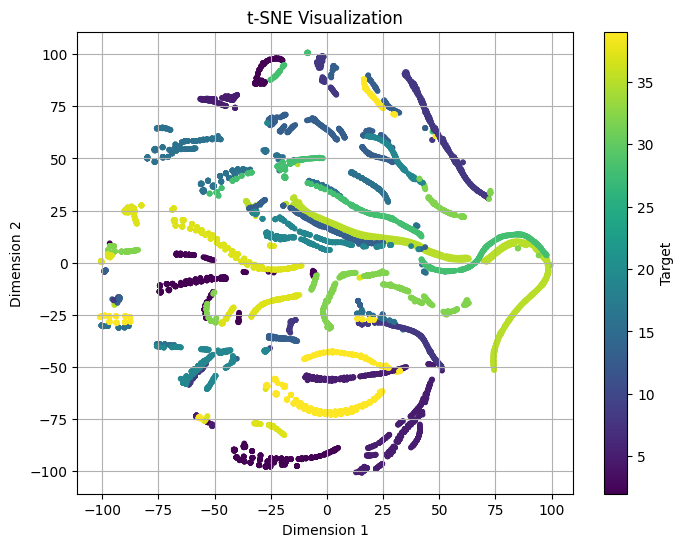

In [7]:
import matplotlib.pyplot as plt

# Assuming 'tsne_df' contains the t-SNE results in DataFrame format
plt.figure(figsize=(8, 6))
plt.scatter(data['Dimension 1'], data['Dimension 2'], c=data['Target'], cmap='viridis', s=10)
# 'Target' assumes you have labels, change it to the appropriate column name if different
plt.colorbar(label='Target')  # Add a colorbar indicating the labels/classes
plt.title('t-SNE Visualization')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid(True)
plt.show()

# One hot encoding

In [8]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv("../datasets/balancedDataset.csv")

In [9]:
df = data
non_categorical_col = df['vehicleregistrationnumber']
label = df["label"]
df.drop("label", axis=1, inplace=True)
df.drop("vehicleregistrationnumber", axis=1, inplace=True)
categorical_cols = ['vehicletype', 'vehiclemodel', 'vehicleprimaryuse']

# One-hot encode categorical columns
one_hot_encoded = pd.get_dummies(df, columns=categorical_cols, dtype=float)

# Concatenate one-hot encoded columns with non-categorical columns
encoded_df = pd.concat([one_hot_encoded, non_categorical_col, label], axis=1)
encoded_df.head()

,vehicletype_0,vehicletype_1,vehicletype_2,vehiclemodel_0,vehiclemodel_2,vehiclemodel_3,vehiclemodel_4,vehiclemodel_5,vehiclemodel_7,vehiclemodel_8,...,vehicleprimaryuse_4,vehicleprimaryuse_5,vehicleprimaryuse_6,vehicleprimaryuse_7,vehicleprimaryuse_8,vehicleprimaryuse_9,vehicleprimaryuse_11,vehicleprimaryuse_12,vehicleregistrationnumber,label
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,35
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,13
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3,35
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,35
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,37


In [10]:
df = encoded_df
registration_number_index = df.columns.get_loc('vehicleregistrationnumber')

# Normalize the vehicleregistrationnumber column
scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(df[['vehicleregistrationnumber']])
df_normalized = pd.DataFrame(df_normalized, columns=['vehicleregistrationnumber'])

# Drop the original unnormalized column
df.drop('vehicleregistrationnumber', axis=1, inplace=True)

# Insert the normalized column at the original position
df.insert(registration_number_index, 'vehicleregistrationnumber', df_normalized)

In [11]:
df.to_csv("../datasets/final.csv", index=False)

# Processed

In [12]:
data = pd.read_csv("../datasets/final.csv")
data.head()

,vehicletype_0,vehicletype_1,vehicletype_2,vehiclemodel_0,vehiclemodel_2,vehiclemodel_3,vehiclemodel_4,vehiclemodel_5,vehiclemodel_7,vehiclemodel_8,...,vehicleprimaryuse_4,vehicleprimaryuse_5,vehicleprimaryuse_6,vehicleprimaryuse_7,vehicleprimaryuse_8,vehicleprimaryuse_9,vehicleprimaryuse_11,vehicleprimaryuse_12,vehicleregistrationnumber,label
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,35
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,13
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.001866,35
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000933,35
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,37


In [13]:
print("Shape:", data.shape)
data["label"].value_counts()

Shape: (8646, 91)


label
35    786
13    786
37    786
8     786
28    786
5     786
19    786
16    786
2     786
39    786
32    786
Name: count, dtype: int64

In [14]:
from sklearn.manifold import TSNE
import pandas as pd

# Split features and labels
X = data.iloc[:int(data.shape[0]), :-1]
y = data.iloc[:int(data.shape[0]), -1]

In [15]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42, method='barnes_hut', verbose=1)
tsne_result = tsne.fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 8646 samples in 0.011s...
[t-SNE] Computed neighbors for 8646 samples in 4.389s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8646
[t-SNE] Computed conditional probabilities for sample 2000 / 8646
[t-SNE] Computed conditional probabilities for sample 3000 / 8646
[t-SNE] Computed conditional probabilities for sample 4000 / 8646
[t-SNE] Computed conditional probabilities for sample 5000 / 8646
[t-SNE] Computed conditional probabilities for sample 6000 / 8646
[t-SNE] Computed conditional probabilities for sample 7000 / 8646
[t-SNE] Computed conditional probabilities for sample 8000 / 8646
[t-SNE] Computed conditional probabilities for sample 8646 / 8646
[t-SNE] Mean sigma: 0.001720
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.188454
[t-SNE] KL divergence after 1000 iterations: 0.121517


In [16]:
# Convert the t-SNE results to a DataFrame
data = pd.DataFrame(tsne_result, columns=['Dimension 1', 'Dimension 2'])
data['Target'] = y

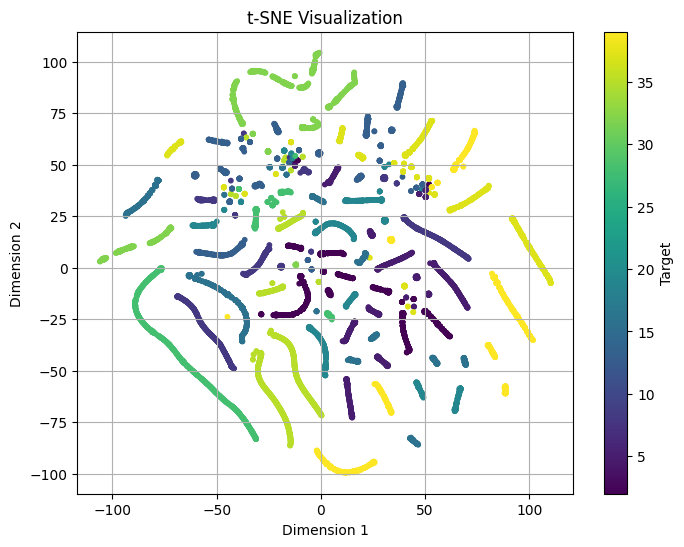

In [17]:
import matplotlib.pyplot as plt

# Assuming 'tsne_df' contains the t-SNE results in DataFrame format
plt.figure(figsize=(8, 6))
plt.scatter(data['Dimension 1'], data['Dimension 2'], c=data['Target'], cmap='viridis', s=10)
# 'Target' assumes you have labels, change it to the appropriate column name if different
plt.colorbar(label='Target')  # Add a colorbar indicating the labels/classes
plt.title('t-SNE Visualization')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid(True)
plt.show()